我們先介紹在機器學習領域最早被開發出來的演算法：感知器Perceptron（也稱為Perceptron Learning Algorithm簡稱PLA）、並教大家如何實作一個perceptron演算法來訓練Iris資料集，並成功分類。

首先要注意Perceptron這個演算法只有在資料是線性可分的形況下才能正確分類（演算法才會停止）。什麼是資料是線性可分呢？以2D的情況簡單來說就是可以在平面上找一條線去完全切出這兩群，3D的話就是可以在空間中找一個平面去切出兩群，下方以Iris 資料集來做資料線性可分的視覺化(為了簡單起見選出其中兩個特徵以及兩種花的種類)。

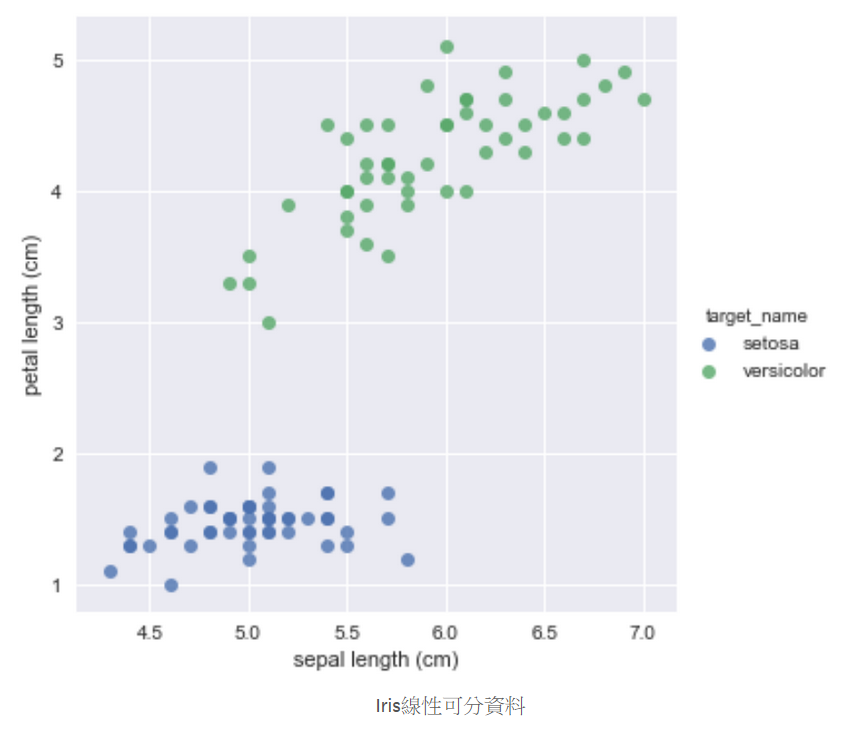

雖然說感知器是以生物的“神經元模型”為基礎所開發出來的演算法，但其實只是概念類似跟真實的生物神經元傳遞訊號的機制類似，除此之外沒有其他關係，大家不用把這個演算法想得太神奇或是跟人的大腦有什麼關聯，先介紹一下神經元的基本構造

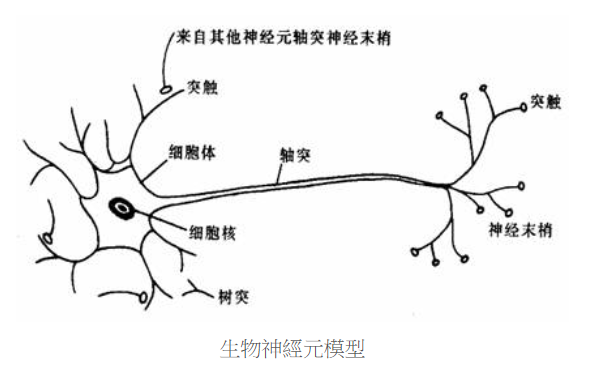

左邊的突觸是神經接收訊息的地方(input)，若input的訊號總和強度大於等於某一個值(threshold)，這個神經元就會透過軸突(axon)發送訊息到右邊的突觸給下一個神經元。舉例來說當你的膝蓋被打超過一定的力道時，膝蓋神經就會發出訊號給肌肉內的神經進行所謂的膝反射。

假設左邊的突觸有n個，每一個input以 x1, x2, x3,…xn來表示的話，當w1*x1 + w2*x2 + w3*x3 +…. wn*xn >某一個定值，就會出發神經元發送信號出去。w1,w2,…wn,以及某一個定值都是這個神經元根據過往經驗學會的數字，也是資料科學家平常說在train這個model到底是在train什麼，就是找出w1,w2…wn以及某一個定值。

為了往後計算方便，資料科學家會把“某一個定值”移到等號左邊當成w0(w0 = 某一個定值的負號, x0 則永遠都是1)，變成x0*w0＋x1*w1+x2*w2+…+xn*wn >0 ，以二元分類來說（+1代表1類, -1但表另一類），只要這些數字大於0就判斷是+1,小於等於零就是-1(也可以定成大於等於0就是+1小於零就是-1) ，以數學方程式來表示的話如下圖所示

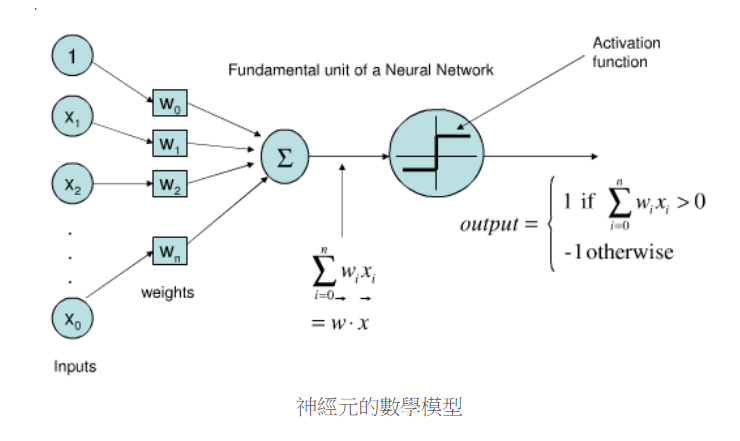

上圖中的Activation function(激勵函數)，就是大於0就判斷1、小於等於0就判斷成是-1。

以Iris dataset資料為例，假設我要判斷這個Iris花是屬於Setosa或是Versicolor，我可以透過花萼的長度以及花瓣的長度來判斷，以數學模型來表示就是： w1x花萼的長度＋w2x花瓣的長度>某一個定值，我就推測這朵花是Setosa或是Versicolor。為了簡單起見可以變成 “某一個定值”x1＋ w1x花萼的長度＋w2x花瓣的長度>0，就推測這朵花是Setosa或是Versicolor。那當中的“某一個定值”跟w1,w2就是從過往的資料學習到的。

接著要介紹如何從過往資料學習如何推出“某一個定值”跟w1,w2了，方便起見把“某一個定值 bias”以w0來表示並加入x0（但x0固定都是1），一開始我們可以隨意給w0,w1,w2一組任意的數字，像是[0,0,0]然後再透過過往資料去更新，更新的規則如下

如果預測錯誤則做如下更新

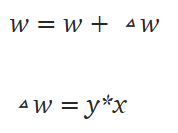

這是什麼意思呢？由於一開始w=[0,0,0]所以 0*1 + 0*花萼的長度 + 0*花瓣的長度 = 0 ，因為≤0 都會預測成Setosa(-1類)，因此這個模型一開始會把所有的花都預測成Setosa。Versicolor花都會被錯誤分類，因此找到第一筆被錯誤分類的Versicolor資料，如果這筆資料的花萼的長度＝3.5,花瓣的長度=6，模型更新後就變成 w = [0,0,0] + 1*[1,3.5,6] 也就是更新之後w = [1,3.5,6]， 其中的“1*”代表y = 1，y在二元分類為+1或是-1。[1,3.5,6]當中的1是因為多了x0，而x0永遠是1的關係。



## 匯入Iris資料集

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data.head()

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 選出花萼長度、花瓣長度以及花的種類欄位

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
target_name = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

In [6]:
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_name']]
iris_data.head(5)

,sepal length (cm),petal length (cm),target_name
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


## 把這target_name欄位的兩種花改成1,-1，主要是為了往後方便計算

In [7]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

In [8]:
iris_data['target_class'] = iris_data['target_name'].map(target_class)
iris_data.head(5)

,sepal length (cm),petal length (cm),target_name,target_class
0,5.1,1.4,setosa,1
1,4.9,1.4,setosa,1
2,4.7,1.3,setosa,1
3,4.6,1.5,setosa,1
4,5.0,1.4,setosa,1


In [9]:
del iris_data['target_name']

In [10]:
iris_data.head(5)

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


## 激勵函數，取名叫sign

In [11]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1

初始化w =[0,0,0] ，你也可以自訂任何想要的數字，w都會透過之後的更新，來自動調整。error =1 主要是紀錄沒有錯誤分類的話就停止，這也是為什麼一定要線性可分，如果資料不是線性可分的話，一定至少有一個錯誤分類存在，因此不會停止。iterator主要是用來記錄更新了幾次。

for i in range(len(iris_data))寫個迴圈一筆一筆去跑iris裡面的資料。

x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]，其中np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2]))是要把x的資料都加上x0=1。

if sign(np.dot(w,x)) != y: 則是指預測失敗時

iterator: 0
x: [1.  7.  4.7]
w: [ 0.  -5.  -4.7]


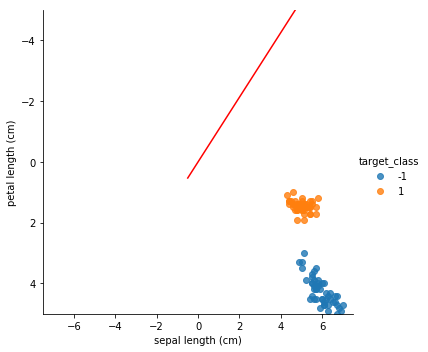

iterator: 1
x: [1.  5.1 1.4]
w: [ 1.   0.1 -3.3]


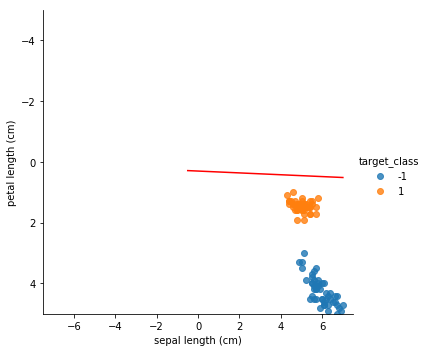

iterator: 2
x: [1.  4.9 1.4]
w: [ 2.   5.  -1.9]


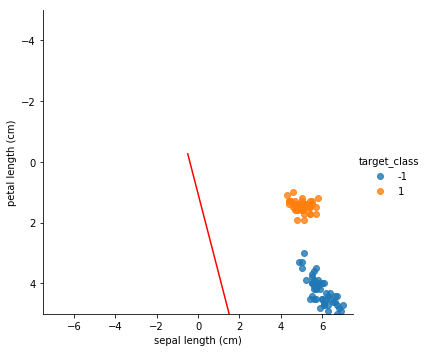

iterator: 3
x: [1.  7.  4.7]
w: [ 1.  -2.  -6.6]


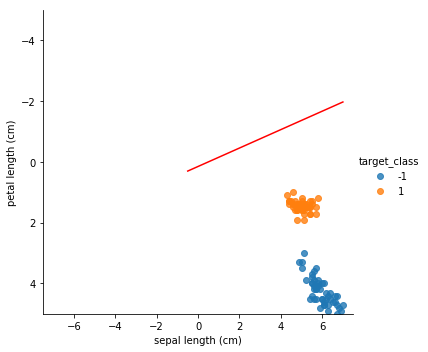

iterator: 4
x: [1.  5.1 1.4]
w: [ 2.   3.1 -5.2]


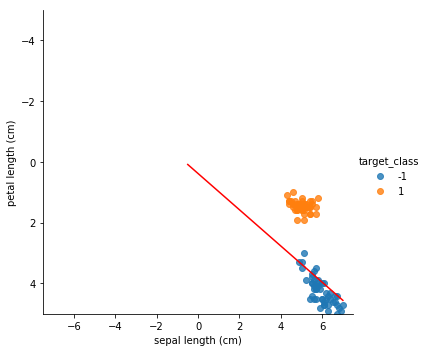

iterator: 5
x: [1.  4.9 3.3]
w: [ 1.  -1.8 -8.5]


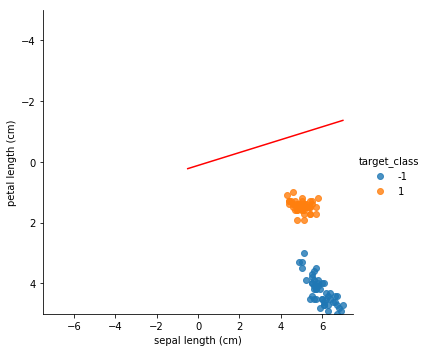

iterator: 6
x: [1.  5.1 1.4]
w: [ 2.   3.3 -7.1]


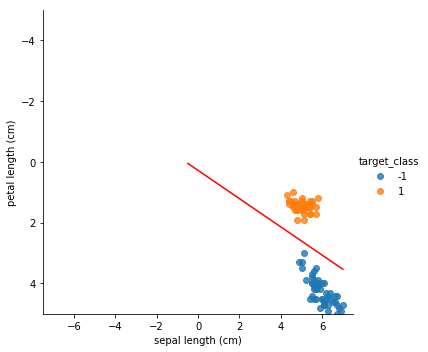

In [12]:
w = np.array([1.,2.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
        #print(x,y)
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')
            
            # 前一個Decision boundary 的法向量
            #if w[1] != 0:
             #   x_last_decision_boundary = np.linspace(0,w[1])
              #  y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
               # plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
                
            ##########################################    
            w += y*x*1                                       #   Y是目標值  X是輸入     
            ##########################################
            
            print("x: " + str(x))            
            print("w: " + str(w))
            # x向量 
            # x_vector = np.linspace(0,x[1])
            # y_vector = (x[2]/x[1])*x_vector
            # plt.plot(x_vector, y_vector,'b')
            # Decision boundary 的方向向量
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            # Decision boundary 的法向量
            #x_decision_boundary_normal_vector = np.linspace(0,w[1])
            #y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            #plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            plt.xlim(-7.5,7.5)
            plt.ylim(5,-5)
            plt.show()


iterator: 0
x: [1.  7.  4.7]
w: [ 0.9   1.3  -0.47]


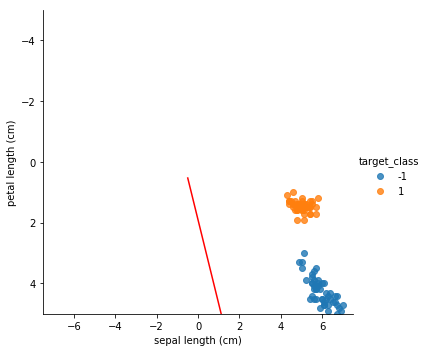

iterator: 1
x: [1.  6.4 4.5]
w: [ 0.8   0.66 -0.92]


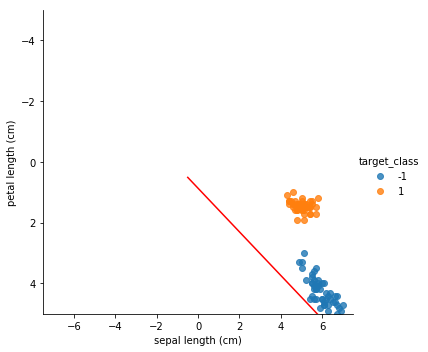

iterator: 2
x: [1.  6.9 4.9]
w: [ 0.7  -0.03 -1.41]


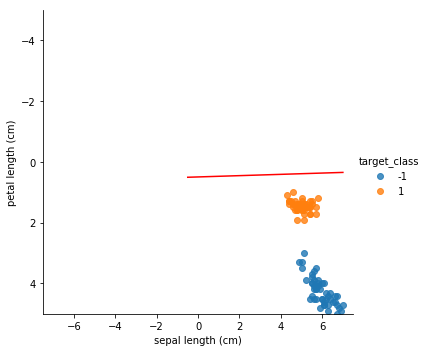

iterator: 3
x: [1.  5.1 1.4]
w: [ 0.8   0.48 -1.27]


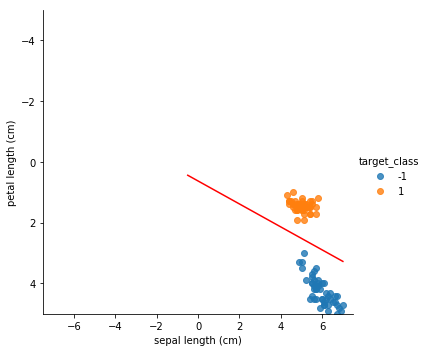

In [13]:
w = np.array([1.,2.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')
            
            # 前一個Decision boundary 的法向量
            #if w[1] != 0:
             #   x_last_decision_boundary = np.linspace(0,w[1])
              #  y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
               # plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
                
            ##########################################    
            w += y*x*0.1                                       #   Y是目標值  X是輸入     
            ##########################################
            
            print("x: " + str(x))            
            print("w: " + str(w))
            # x向量 
            # x_vector = np.linspace(0,x[1])
            # y_vector = (x[2]/x[1])*x_vector
            # plt.plot(x_vector, y_vector,'b')
            # Decision boundary 的方向向量
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            # Decision boundary 的法向量
            #x_decision_boundary_normal_vector = np.linspace(0,w[1])
            #y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            #plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            plt.xlim(-7.5,7.5)
            plt.ylim(5,-5)
            plt.show()


iterator: 0
x: [1.  7.  4.7]
w: [ -9. -68. -47.]


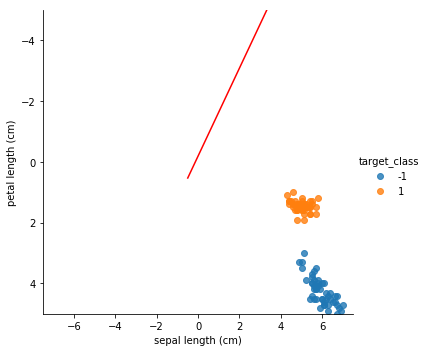

iterator: 1
x: [1.  5.1 1.4]
w: [  1. -17. -33.]


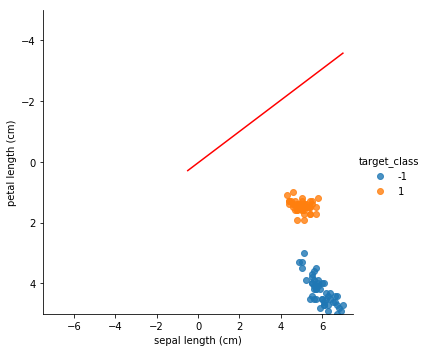

iterator: 2
x: [1.  4.9 1.4]
w: [ 11.  32. -19.]


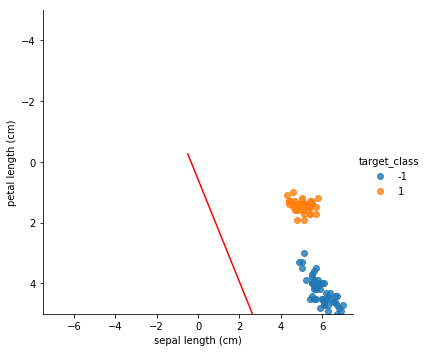

iterator: 3
x: [1.  7.  4.7]
w: [  1. -38. -66.]


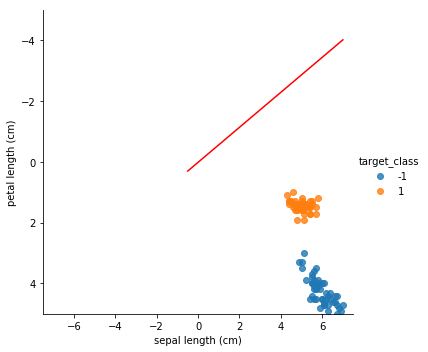

iterator: 4
x: [1.  5.1 1.4]
w: [ 11.  13. -52.]


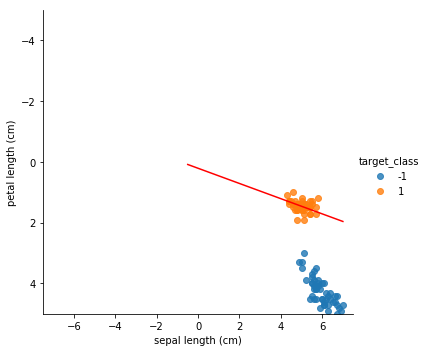

iterator: 5
x: [1.  4.6 1.5]
w: [ 21.  59. -37.]


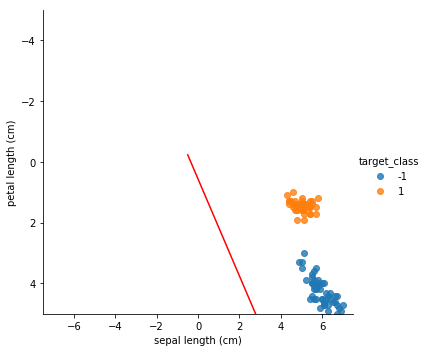

iterator: 6
x: [1.  7.  4.7]
w: [ 11. -11. -84.]


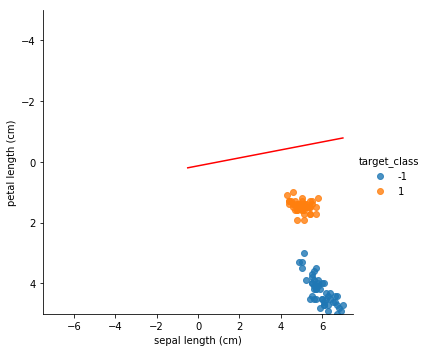

iterator: 7
x: [1.  5.1 1.4]
w: [ 21.  40. -70.]


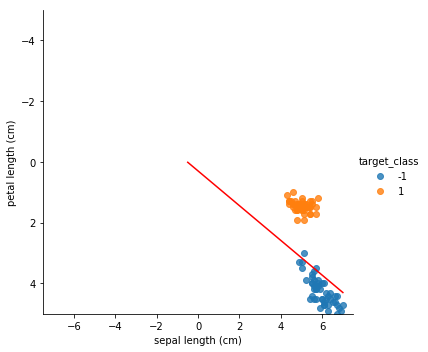

iterator: 8
x: [1.  5.7 3.5]
w: [  11.  -17. -105.]


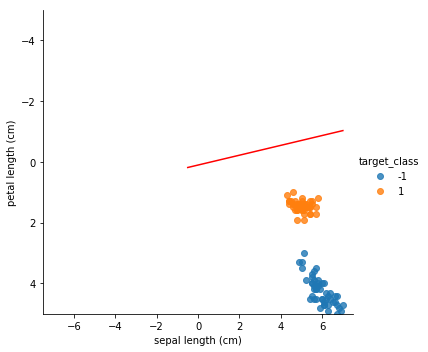

iterator: 9
x: [1.  5.1 1.4]
w: [ 21.  34. -91.]


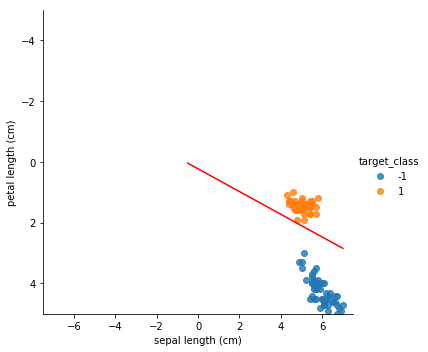

In [14]:
w = np.array([1.,2.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')
            
            # 前一個Decision boundary 的法向量
            #if w[1] != 0:
             #   x_last_decision_boundary = np.linspace(0,w[1])
              #  y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
               # plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
                
            ##########################################    
            w += y*x*10                                       #   Y是目標值  X是輸入     
            ##########################################
            
            print("x: " + str(x))            
            print("w: " + str(w))
            # x向量 
            # x_vector = np.linspace(0,x[1])
            # y_vector = (x[2]/x[1])*x_vector
            # plt.plot(x_vector, y_vector,'b')
            # Decision boundary 的方向向量
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            # Decision boundary 的法向量
            #x_decision_boundary_normal_vector = np.linspace(0,w[1])
            #y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            #plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            plt.xlim(-7.5,7.5)
            plt.ylim(5,-5)
            plt.show()


到這邊我們找到完美的一條線，成功的把資料分成兩群，未來的新進的資料就可以用這條線去預測到底是屬於哪一類的花。

Perception優點：

    最簡單的線性分類演算法，Perception演算法的原理可推廣至其他複雜的演算法，因此許多課程或是書籍皆會以此當作最初的教材。

Perception缺點：

    一定要線性可分Perception演算法才會停下來（實務上我們沒辦法事先知道資料是否線性可分）
    Perception演算法的錯誤率不會逐步收斂
    Perception演算法只知道結果是A類還B類，但沒辦法知道是A, B類的機率是多少（接下來要介紹的Logistic regression可解決此問題）